
# Phân loại bệnh tiểu đường (Pima Indians Diabetes Dataset)

## 1. Định nghĩa vấn đề (Define Problem)

- **Mô tả bài toán**:  
  Xây dựng mô hình học máy để dự đoán khả năng mắc bệnh tiểu đường ở phụ nữ gốc Pima Indian, dựa trên các chỉ số sức khỏe.

- **Nguồn dữ liệu**:  
  Bộ dữ liệu "Pima Indians Diabetes" từ UCI Machine Learning Repository / Kaggle.

- **Thuộc tính (Input Features)**:  
  - Pregnancies: số lần mang thai  
  - Glucose: nồng độ glucose huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose  
  - BloodPressure: huyết áp tâm trương (mm Hg)  
  - SkinThickness: độ dày nếp gấp da ở cơ tam đầu (mm)  
  - Insulin: nồng độ insulin huyết thanh 2 giờ (mu U/ml)  
  - BMI: chỉ số khối cơ thể (kg/m^2)  
  - DiabetesPedigreeFunction: điểm số phả hệ tiểu đường  
  - Age: tuổi (năm)

- **Mục tiêu dự đoán (Output/Label)**:  
  - Outcome: 0 (không mắc tiểu đường), 1 (mắc tiểu đường)


## 2. Chuẩn bị dữ liệu (Prepare Data)

In [13]:

# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [14]:

# Load dataset
file_path = "pima-indians-diabetes.data.csv"
column_names = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

data = pd.read_csv(file_path, names=column_names)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.1 Khám phá dữ liệu (EDA)

In [15]:

print("Kích thước dữ liệu:", data.shape)
print(data.info())
data.describe()


Kích thước dữ liệu: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:

# Kiểm tra giá trị 0 bất thường
(data == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

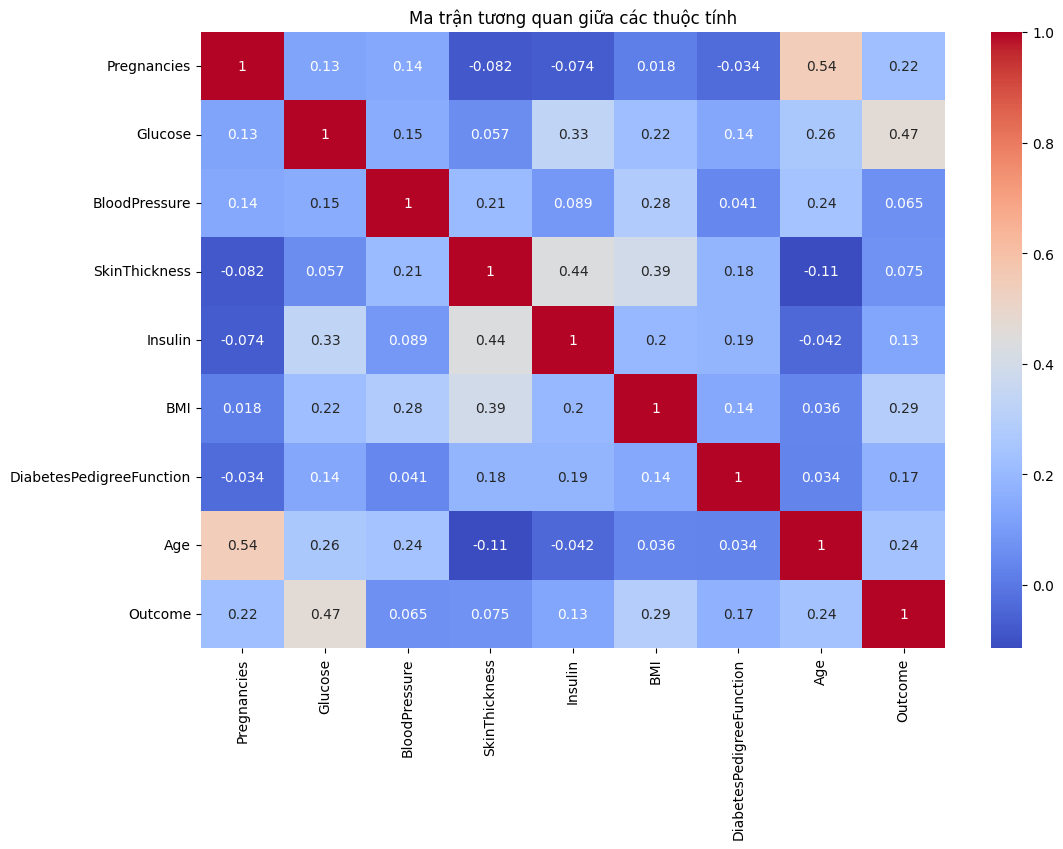

In [17]:

# Trực quan hóa
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()


### 2.2 Xử lý dữ liệu thiếu / ngoại lai (Missing & Outliers)

In [18]:

cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)
data.fillna(data.median(), inplace=True)
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2.3 Chuẩn hóa dữ liệu (Scaling)

In [19]:

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Chia tập dữ liệu (Data Splitting)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)


## 4. Xây dựng mô hình (Modeling)

In [21]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.7013
Decision Tree: Accuracy = 0.6818
Random Forest: Accuracy = 0.7792
KNN: Accuracy = 0.7532
SVM: Accuracy = 0.7338


## 5. Đánh giá mô hình (Evaluate)

Mô hình tốt nhất: Random Forest
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



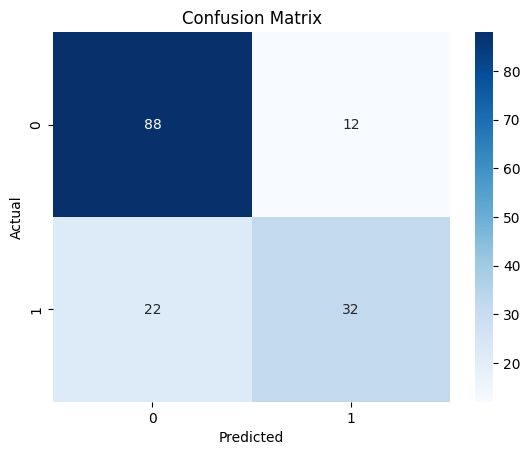

In [22]:

best_model = max(results, key=results.get)
print("Mô hình tốt nhất:", best_model)

model = models[best_model]
y_pred = model.predict(X_test)

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


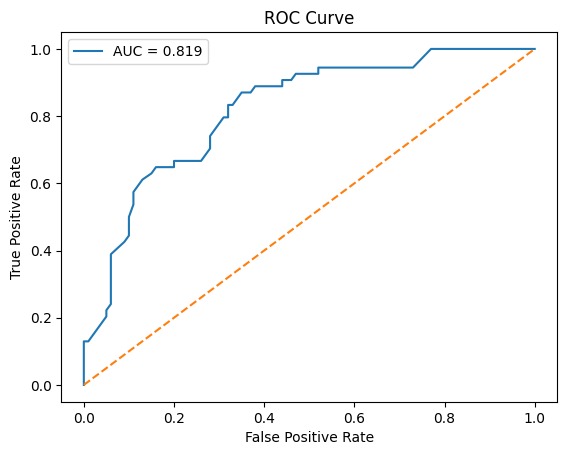

In [23]:

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 6. Cải tiến mô hình (Improve Model)

In [24]:

from sklearn.model_selection import GridSearchCV

# Ví dụ cải tiến cho Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7736505397840863



## 7. Kết luận (Conclusion)

- Bộ dữ liệu Pima Indians Diabetes giúp dự đoán nguy cơ mắc bệnh tiểu đường.  
- Các mô hình cơ bản như Logistic Regression, Random Forest, SVM đạt kết quả khả quan.  
- Sau khi tuning siêu tham số, mô hình có thể cải thiện thêm về độ chính xác.  
- Hạn chế: dữ liệu nhỏ, có nhiều giá trị thiếu/0 nên cần xử lý cẩn thận.  
- Hướng phát triển: thử các mô hình mạnh hơn (XGBoost, LightGBM), kết hợp nhiều mô hình (Ensemble), áp dụng trên dữ liệu lớn hơn.
